In [1]:
# import library
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import random
from bokeh.core.properties import value
from keras.models import Sequential

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/usr/lib/python3/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#write a function that allows to load the data in the 35 files for each station
def loadData():
    stationsRainfall = []
    for i in range(1,36):
        i = str(i)
        df = pd.read_csv('./WorkstationsData/'+i+'.csv', sep=',', 
                  names = ["StationIndex", "Station", "Year", "Month", "Day", "Rainfall"])
        df = df[df.Year > 1998]
        stationsRainfall.append(df)
    return stationsRainfall

In [3]:
def stationRainfallMeanByDay(station):
    stationsRainfall = loadData()
    listDay = []  ## stock list of year for station
    meanRainfallStation = []  ## mean rainfall for each year for station
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            listDay = stationsRainfall[i].Day.unique()
            meanRainfall = stationsRainfall[i].groupby('Day').Rainfall.mean()
            for i in range(len(listDay)):
                meanRainfallStation.append(meanRainfall[listDay[i]])
            break
    return listDay, meanRainfallStation

In [4]:
def Plot_RainfallMeanByStationbyDay(station):
    stationsRainfall = loadData()
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            days, meanRainfallStationByDay = stationRainfallMeanByDay(station)
            
    colors= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(days))]        
    fig = plt.figure(figsize=(15, 10))
    #plt.figure(figsize=(18, 12))

    sns.barplot(x=days, y=meanRainfallStationByDay, palette= colors).set_title('Rainfall by year for '+station+'')


# 1. Understanding and identifying the relationship between the variables namely the variance and covariances, and the dependence. Qualitatively and quantitatively. 

# 1.1. Days and Rainfall

        Mean       std
0   6.408936  2.411675
1   6.210414  2.141710
2   5.874465  1.704281
3   5.741593  1.753492
4   6.187423  2.296687
5   6.821464  1.837130
6   6.222274  2.440226
7   7.275206  2.641240
8   7.141216  3.102790
9   6.490279  2.412387
10  6.807296  2.898961
11  7.241254  2.828743
12  6.751368  2.367196
13  6.658060  2.327253
14  6.596114  2.749374
15  6.737996  2.690756
16  6.438789  2.608148
17  6.122320  2.289842
18  6.359367  2.117882
19  7.572680  2.872361
20  7.801565  2.637013
21  7.813170  2.039922
22  7.103046  1.978982
23  6.430907  2.312485
24  6.340792  2.337102
25  6.071340  2.016118
26  7.121487  2.839288
27  6.569988  2.350059
28  6.573897  2.354874
29  6.283344  2.817399
30  3.382068  1.219749


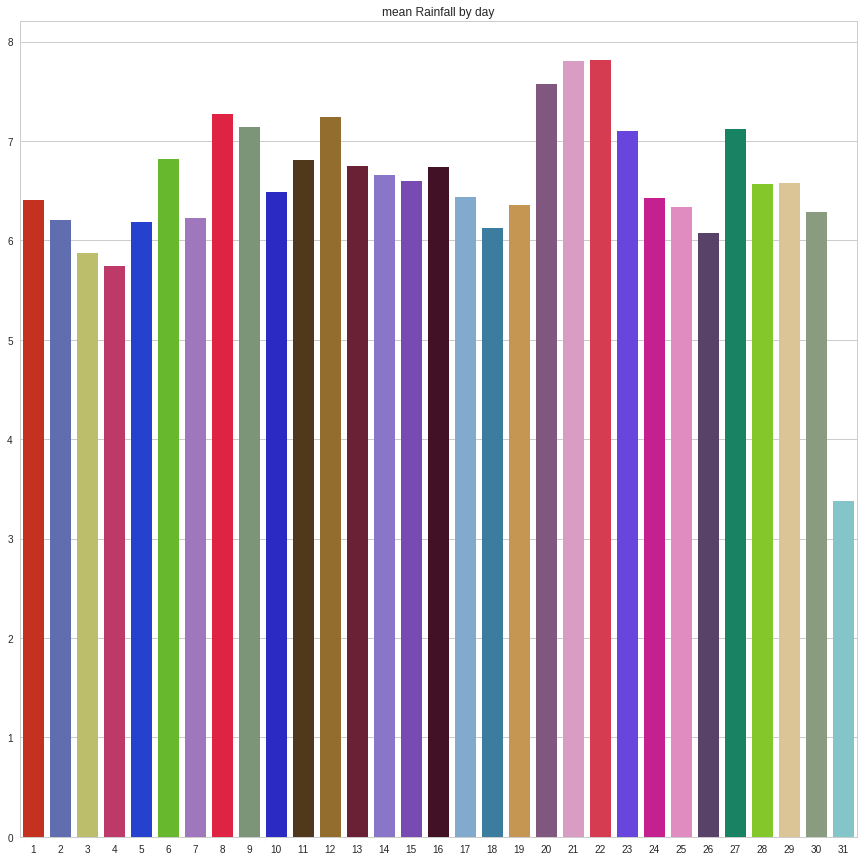

In [5]:
def stationRainfallMeanByYear():
    stationsRainfall = loadData()
    rainfallByDay = {}
    meanByDay = []
    std = []
    for i in range(len(stationsRainfall)):
            days, meanRainfallStationByDay = stationRainfallMeanByDay(stationsRainfall[i]['Station'].iloc[0])
            j=0
            for day in days:
                if day not in rainfallByDay:
                    rainfallByDay[day] = list()
                rainfallByDay[day].append(meanRainfallStationByDay[j])
                j += 1
    for j in range(len(days)):
        meanByDay.append(np.array(rainfallByDay[j+1]).mean())
        std.append(np.array(rainfallByDay[j+1]).std())
    d = {'Mean': meanByDay, 'std': std}
    df = pd.DataFrame(data=d)
    print(df)
    
    colors= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                     for i in range(len(days))]        
    fig = plt.figure(figsize=(15, 15))
        #plt.figure(figsize=(18, 12))
    sns.set_style("whitegrid")
    p = sns.barplot(x=days, y=meanByDay, palette= colors).set_title('mean Rainfall by day')
    p.figure.savefig('daysRainfall.svg', dpi=2000)
stationRainfallMeanByYear()

# we can see that we have the almost the same mean rainfall by day from 1999 to 2016 in bangladesh. this mean varies between 5.7415 and 7.8131 except day 31 with 3.3820 and we can understand that this is due to the fact that not every month has 31 day 

# 1.2.  Rainfall by station 1970 - 2016 (Relationship between Rainfall station and year)

In [6]:
def stationRainfallMeanByYear1(station):
    stationsRainfall = loadData()
    listYear = []  ## stock list of year for station
    meanRainfallStation = []  ## mean rainfall for each year for station
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            #print('==================================================================================')
            #print('maximum rainfall by year for ', station)
            #print('==================================================================================')
            #print(stationsRainfall[i].groupby('Year').Rainfall.max())
            #print('==================================================================================')
            #print('minimum rainfall by year for ', station)
            #print('==================================================================================')
            #print(stationsRainfall[i].groupby('Year').Rainfall.min())
            #print('==================================================================================')
            #print('mean rainfall by year for ', station)
            #print('==================================================================================')
            #print(stationsRainfall[i].groupby('Year').Rainfall.mean())
            #print('==================================================================================')
            #print(' standard deviation rainfall by year for ', station)
            #print('==================================================================================')
            #print(stationsRainfall[i].groupby('Year').Rainfall.std())
            listYear = stationsRainfall[i].Year.unique()
            meanRainfall = stationsRainfall[i].groupby('Year').Rainfall.mean()
            for i in range(len(listYear)):
                meanRainfallStation.append(meanRainfall[listYear[i]])
            break
    return listYear, meanRainfallStation

In [7]:
def maxRainfallByStationByYear(station, year):
    stationsRainfall = loadData()
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            return stationsRainfall[i].groupby('Year').Rainfall.max()[year]
        
def meanRainfallByStationByYear(station, year):
    stationsRainfall = loadData()
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            return stationsRainfall[i].groupby('Year').Rainfall.mean()[year]
        
def stdRainfallByStationByYear(station, year):
    stationsRainfall = loadData()
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            return stationsRainfall[i].groupby('Year').Rainfall.std()[year]


In [8]:
def stationRainfallByYear():
    stationsRainfall = loadData()
    dictRain = {}  ## stock list of year for station
    listStation = []  ## mean rainfall for each year for station
    listYear = stationsRainfall[0].Year.unique()
    for i in range(len(stationsRainfall)):
        if(stationsRainfall[i]['Station'].iloc[0] != 'Sandwip' and stationsRainfall[i]['Station'].iloc[0] != 'Chittagong'):
            listStation.append(stationsRainfall[i]['Station'].iloc[0])
            for year in listYear:
                if year not in dictRain:
                    dictRain[year] = list()
                dictRain[year].append(meanRainfallByStationByYear(stationsRainfall[i]['Station'].iloc[0], year))
    df = pd.DataFrame(dictRain, index=listStation)
stationRainfallByYear()

In [9]:
def Plot_RainfallMeanByYear():
    stationsRainfall = loadData()
    listStation = []
    for i in range(len(stationsRainfall)):
        listStation.append(stationsRainfall[i]['Station'].unique()[0])
    totalRainfall = []
    for i in range(len(listStation)):
        year, meanRain = stationRainfallMeanByYear1(listStation[i])
        totalRainfall.append(meanRain)
    fig = plt.figure(1, figsize=(18, 15))

    # Create an axes instance
    ax = fig.add_subplot(111)
    
    # Create the boxplot
    bp = ax.boxplot(totalRainfall, labels=listStation,
               patch_artist=True)
    ax.set_title('Mean rainfall from 1999 to 2016 by station in Bangladesh')
    ax.set_xlabel('station')
    ax.set_ylabel('Mean rainfall')
    for label in ax.get_xticklabels():
        label.set_rotation(90)
    
    colors= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(listStation))]
    ## change outline color, fill color and linewidth of the boxes
    i = 0
    for box in bp['boxes']:

        # change outline color
        box.set( color='#7570b3', linewidth=2)
        # change fill color
        box.set( facecolor =  colors[i] )
        i += 1
   # ax.legend(bp["boxes"][0:36], listStation, loc='upper left')

    plt.savefig('rainfall.svg', dpi=2000)

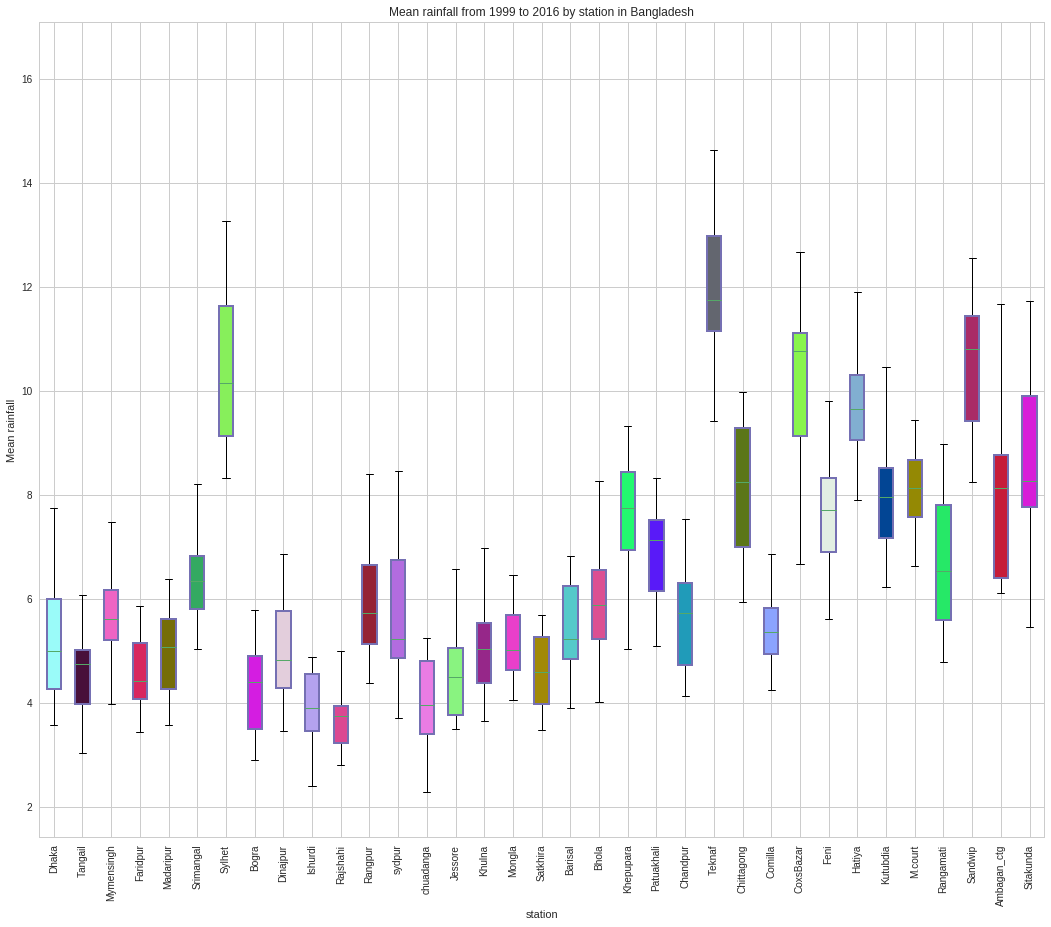

In [10]:
Plot_RainfallMeanByYear()

# Interpretation:
From the previous figure, representing the average rainfall in each station from 1999 to 2016, we can deduce that the quantity of rainfall is higher in Sylhet and Teknaf stations with respective median values of about 10 and almost 12. We also see that the rain is lower in the stations Ishurdi, Rajshahi with about 4 of median. So the amount of rainfall can be varied from one station to another.

In [11]:
def stationRainfallMeanByMonth(station):
    stationsRainfall = loadData()
    listMonth = []  ## stock list of month for station
    meanRainfallStationByMonth = []  ## mean rainfall for each month for station
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            print('===================================================')
            print('maximum rainfall by Month for ', station)
            print('===================================================')
            print(stationsRainfall[i].groupby('Month').Rainfall.max())
            print('===================================================')
            print('mean rainfall by Month for ', station)
            print('====================================================')
            print(stationsRainfall[i].groupby('Month').Rainfall.mean())
            print('====================================================')
            print(' standard deviation rainfall by Month for ', station)
            print('=====================================================')
            print(stationsRainfall[i].groupby('Month').Rainfall.std())
            listMonth = stationsRainfall[i].Month.unique()
            meanRainfall = stationsRainfall[i].groupby('Month').Rainfall.mean()
            for i in range(len(listMonth)):
                meanRainfallStationByMonth.append(meanRainfall[listMonth[i]])
            break
    return listMonth, meanRainfallStationByMonth

In [15]:
def Plot_RainfallMeanByStation(station):
    stationsRainfall = loadData()
    listYear = stationsRainfall[0].Year.unique()
    for i in range(len(stationsRainfall)):
        if stationsRainfall[i]['Station'].iloc[0] == station:
            years, meanRainByYear = stationRainfallMeanByYear1(station)
            months, meanRainfallStationByMonth = stationRainfallMeanByMonth(station)
            
    colors= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(listYear))]  
    colors1= ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(len(months))] 
    fig = plt.figure(figsize=(10, 8))


    p = sns.barplot(x=years, y=meanRainByYear, palette= colors).set_title('Rainfall by year for '+station+'')
    p.figure.savefig('ranfallY.svg', dpi=3000)
    fig = plt.figure(figsize=(10, 8))
   
    p1 = sns.barplot(x=months, y=meanRainfallStationByMonth , palette= colors[1:12]).set_title('Rainfall by month for '+station+'')
    p1.figure.savefig('ranfallM.svg', dpi=3000)

maximum rainfall by Month for  Dhaka
Month
1      14
2      54
3     107
4     102
5     152
6     152
7     333
8     133
9     341
10    158
11     95
12     61
Name: Rainfall, dtype: int64
mean rainfall by Month for  Dhaka
Month
1      0.136201
2      0.471326
3      1.413978
4      3.510753
5      8.094982
6     10.867384
7     12.616487
8      9.937276
9      9.342294
10     5.281362
11     0.507168
12     0.243728
Name: Rainfall, dtype: float64
 standard deviation rainfall by Month for  Dhaka
Month
1      0.995185
2      3.645671
3      7.641586
4     10.221377
5     17.373393
6     19.398967
7     24.486978
8     18.074889
9     23.468671
10    15.566895
11     4.601434
12     3.190215
Name: Rainfall, dtype: float64


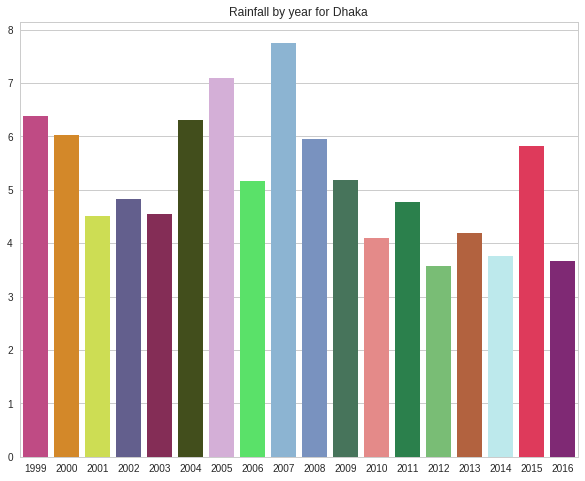

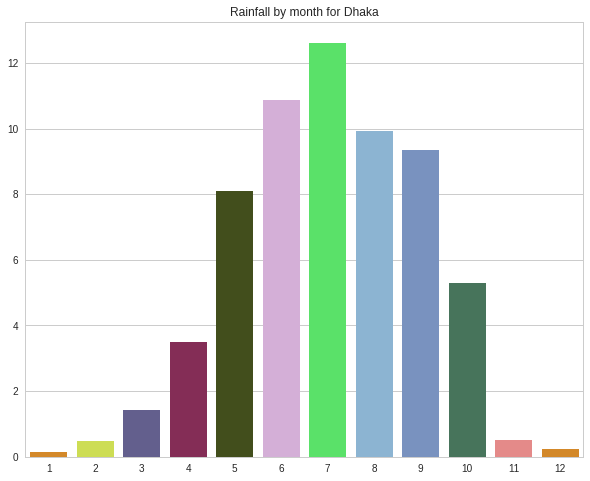

In [18]:
Plot_RainfallMeanByStation('Dhaka')

maximum rainfall by Month for  Rangpur
Month
1      22
2      32
3      66
4     113
5     111
6     281
7     171
8     256
9     294
10    227
11     10
12     25
Name: Rainfall, dtype: int64
mean rainfall by Month for  Rangpur
Month
1      0.209677
2      0.338710
3      0.921147
4      4.306452
5      9.168459
6     14.826165
7     13.290323
8     11.267025
9     10.921147
10     6.453405
11     0.084229
12     0.107527
Name: Rainfall, dtype: float64
 standard deviation rainfall by Month for  Rangpur
Month
1      1.576572
2      2.123217
3      4.582092
4     11.551819
5     16.842504
6     28.524396
7     24.739685
8     26.136749
9     26.070080
10    26.005533
11     0.737604
12     1.458922
Name: Rainfall, dtype: float64


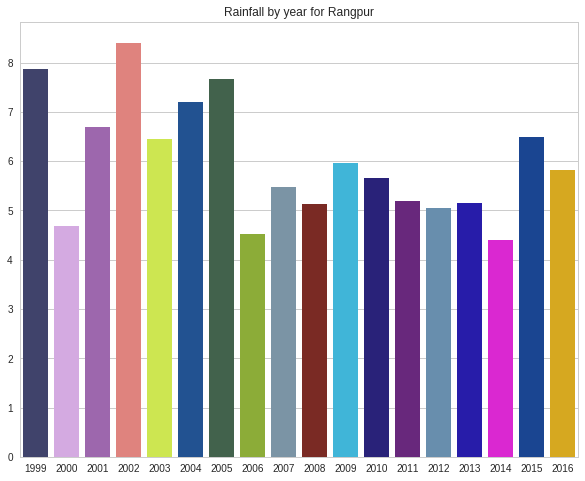

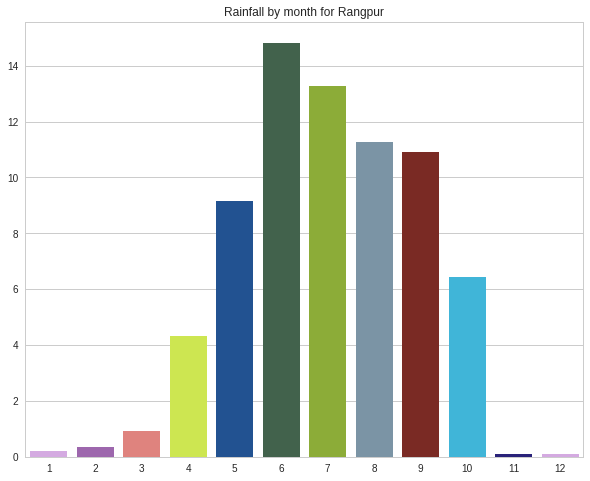

In [17]:
Plot_RainfallMeanByStation('Rangpur')